<a href="https://colab.research.google.com/github/abhir8008/Pytorch_DeepLearning/blob/master/Pytorch_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
transform = transforms.ToTensor()

In [5]:
train_data = datasets.MNIST(root='../Data',train = True,download=True,transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../Data/MNIST/raw/train-images-idx3-ubyte.gz to ../Data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../Data/MNIST/raw/train-labels-idx1-ubyte.gz to ../Data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../Data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../Data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../Data/MNIST/raw



In [6]:
test_data = datasets.MNIST(root='../Data',train = False,download=True,transform=transform)

In [7]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [10]:
#train_data[0]

In [11]:
image,label = train_data[0]

In [12]:
image.shape

torch.Size([1, 28, 28])

In [13]:
label

5

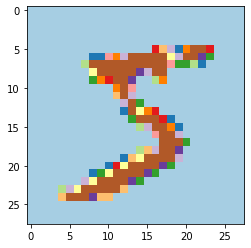

In [14]:
plt.imshow(image.reshape((28,28)),cmap='Paired')

In [15]:
torch.manual_seed(101)

train_loader = DataLoader(train_data,batch_size=100,shuffle=True)

test_loader = DataLoader(test_data,batch_size=500,shuffle=False)

In [16]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) #FORMATTING

In [17]:
for images,labels in train_loader:
  break

In [18]:
images.shape

torch.Size([100, 1, 28, 28])

In [19]:
labels.shape

torch.Size([100])

Labels:  [   7    2    3    5    8    5    3    6    9    9    1    3]


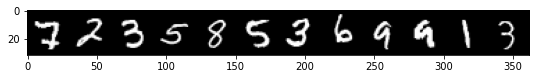

In [20]:
print('Labels: ',labels[:12].numpy())
im = make_grid(images[:12], nrow=12)
plt.figure(figsize=(9,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)));

In [21]:
class MultilayerPerceptron(nn.Module):
  def __init__(self,in_sz = 784,out_sz=10,layers=[120,84]): #in, out, 2 hidden Layers12
    super().__init__()
    self.fc1 = nn.Linear(in_sz,layers[0])
    self.fc2 = nn.Linear(layers[0],layers[1])
    self.fc3 = nn.Linear(layers[1],out_sz)

  def forward(self,X):

    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X,dim =1) 

In [22]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [23]:
for param in model.parameters():
  print(param.numel())

94080
120
10080
84
840
10


In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [25]:
images.shape

torch.Size([100, 1, 28, 28])

In [26]:
images.view(100,-1).shape #find it how and what

torch.Size([100, 784])

In [ ]:
import time
start_time = time.time()

#training
epochs = 2

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):

  trn_corr = 0
  tst_corr = 0

  for b,(X_train,y_train) in enumerate(train_loader): # Dataset_train me X and y hai

    b+=1

    y_pred = model(X_train.view(100,-1))  #model me jayega ye
    loss = criterion(y_pred,y_train)  # nn.criterion me loss funtion aayega

    predicted = torch.max(y_pred.data,1)[1]   # maximum probability walla prediction hoga
    batch_corr = (predicted == y_train).sum() # agar prediction or y_train ka label match hoga tb ushko add krengy
    trn_corr +=batch_corr                     # 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%200==0:
      acc = trn_corr.item()*100/(100*b)
      print(f'Epoch {i} batch{b} loss:{loss.item()} accuracy:{acc}')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():

      for b, (X_test,y_test) in enumerate(test_loader):

        y_val = model(X_test.view(500,-1))
        predicted = torch.max(y_val.data,1)[1]
        tst_corr += (predicted == y_test).sum()


total_time = time.time() - start_time
print(f'Duration: {total_time/60} mins')

In [ ]:
plt.plot(train_losses,label='training loss')
plt.plot(test_losses,label='Test/validation loss')
plt.legend()

In [ ]:
train_acc = [t/600 for t in train_correct]

In [ ]:
test_acc = [t/100 for t in test_correct]

In [ ]:
plt.plot(train_acc,label='training acc')
plt.plot(test_acc,label='Test acc')
plt.legend()

In [ ]:
test_load_all = DataLoader(test_data,batch_size = 1000, shuffle=False)

In [ ]:
with torch.no_grad():
  correct = 0

  for X_test,y_test in test_load_all:
    y_val = model.(X_test.view(len(X_test)))
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()
    

In [ ]:
100*correct.item()/len(test_data)

In [ ]:
confusion_matrix(predicted.view(-1),y_test.view(-1))